# Google Drive

In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Lib Imports

In [49]:
import os
import time
import torch
import pandas as pd
import matplotlib.pyplot as plt

# Path for FedHeal Repo

In [50]:
project_path = '/content/drive/My Drive/FedHEAL_SAS' # Zaeem's Folder path
# project_path = '/content/drive/My Drive/Colab Notebooks/Adv ML/Project/FedHEAL_SAS' # Fayzan's Folder path
os.chdir(project_path)

# Timer Function

In [51]:
def calculate_time(start_time, end_time):
    elapsed_time = end_time - start_time
    hours = int(elapsed_time // 3600)
    minutes = int((elapsed_time % 3600) // 60)
    seconds = elapsed_time % 60
    print(f"Total Execution Time: {hours}h {minutes}m {seconds:.2f}s")

# Configuration Variables

In [52]:
# Number of communication rounds in federated learning (global aggregation cycles)
communication_epoch_var =  50

# Number of local training epochs for each participant before global aggregation
local_epoch_var = 10

# Total number of participants in the federated learning setup
no_of_total_clients = 18

# Number of clients using MNIST dataset
no_of_mnist_clients = 6

# Number of clients using USPS dataset
no_of_usps_clients = 6

# Number of clients using SVHN dataset
no_of_svhn_clients = 6

# Number of clients using SYN dataset
no_of_syn_clients = 0

# Random seed for reproducibility of experiments
random_seed = 42

# Option for applying learning rate decay (0 = No decay, 1 = Apply decay)
learning_decay = 0

# Threshold value for HEAL (Hyperparameter for filtering updates) Default is 0.3
threshold = 0.5

# Momentum update factor (beta) used in HEAL Default is 0.4
beta = 0.5

# Averaging strategy for federated learning ("weight" or "equal")
averaging = 'weight'

# Storing CSV Files
csv_log_number = 1

# **FedHeal**

In [53]:
model_name = 'fedavgheal'

# Start timer
start_time = time.time()
print("Start Time:", start_time)

# Execute main training script with arguments passed as variables
!python main.py --device_id 0 \
--communication_epoch {communication_epoch_var} \
--local_epoch {local_epoch_var} \
--syn {no_of_syn_clients} \
--parti_num {no_of_total_clients} \
--mnist {no_of_mnist_clients} \
--usps {no_of_usps_clients} \
--svhn {no_of_svhn_clients} \
--seed {random_seed} \
--learning_decay {learning_decay} \
--threshold {threshold} \
--beta {beta} \
--averaging {averaging} \
--model {model_name} \
--csv_log {csv_log_number}


# End timer
end_time = time.time()
print("End Time:", end_time)
calculate_time(start_time, end_time)

Start Time: 1734955365.3829277
officecaltech
fl_officecaltech
digits
fl_digits
fedavgheal_18_fl_digits_50_10
./Logs/fl_digits/fedavgheal
Counter({'mnist': 6, 'usps': 6, 'svhn': 6})
['mnist' 'mnist' 'usps' 'mnist' 'mnist' 'svhn' 'svhn' 'svhn' 'usps'
 'mnist' 'usps' 'svhn' 'mnist' 'svhn' 'usps' 'usps' 'svhn' 'usps']
 'mnist' 'usps' 'svhn' 'mnist' 'svhn' 'usps' 'usps' 'svhn' 'usps']
Using downloaded and verified file: ./data0/train_32x32.mat
Using downloaded and verified file: ./data0/train_32x32.mat
Using downloaded and verified file: ./data0/train_32x32.mat
Using downloaded and verified file: ./data0/train_32x32.mat
Using downloaded and verified file: ./data0/train_32x32.mat
Using downloaded and verified file: ./data0/train_32x32.mat
DOMAINS_LIST:  ['mnist', 'usps', 'svhn', 'syn']
Using downloaded and verified file: ./data0/test_32x32.mat
Using downloaded and verified file: ./data0/test_32x32.mat
Using downloaded and verified file: ./data0/test_32x32.mat
Using downloaded and verified fi

# **FedAvg**

In [45]:
model_name = 'fedavg'

# Start timer
start_time = time.time()
print("Start Time:", start_time)

# Execute main training script with arguments passed as variables
!python main.py --device_id 0 \
--communication_epoch {communication_epoch_var} \
--local_epoch {local_epoch_var} \
--syn {no_of_syn_clients} \
--parti_num {no_of_total_clients} \
--mnist {no_of_mnist_clients} \
--usps {no_of_usps_clients} \
--svhn {no_of_svhn_clients} \
--seed {random_seed} \
--learning_decay {learning_decay} \
--threshold {threshold} \
--beta {beta} \
--averaging {averaging} \
--model {model_name} \
--csv_log {csv_log_number}

# End timer
end_time = time.time()
print("End Time:", end_time)
calculate_time(start_time, end_time)

Start Time: 1734946949.8767629
officecaltech
fl_officecaltech
digits
fl_digits
fedavg_18_fl_digits_50_10
./Logs/fl_digits/fedavg
Counter({'mnist': 6, 'usps': 6, 'svhn': 6})
['mnist' 'mnist' 'usps' 'mnist' 'mnist' 'svhn' 'svhn' 'svhn' 'usps'
 'mnist' 'usps' 'svhn' 'mnist' 'svhn' 'usps' 'usps' 'svhn' 'usps']
 'mnist' 'usps' 'svhn' 'mnist' 'svhn' 'usps' 'usps' 'svhn' 'usps']
Using downloaded and verified file: ./data0/train_32x32.mat
Using downloaded and verified file: ./data0/train_32x32.mat
Using downloaded and verified file: ./data0/train_32x32.mat
Using downloaded and verified file: ./data0/train_32x32.mat
Using downloaded and verified file: ./data0/train_32x32.mat
Using downloaded and verified file: ./data0/train_32x32.mat
DOMAINS_LIST:  ['mnist', 'usps', 'svhn', 'syn']
Using downloaded and verified file: ./data0/test_32x32.mat
Using downloaded and verified file: ./data0/test_32x32.mat
Using downloaded and verified file: ./data0/test_32x32.mat
Using downloaded and verified file: ./da

# **Mean Accuracy Plot: FedAvg VS FedHeal**

In [54]:
# Generate filenames dynamically
def generate_filename(model_name, dataset_name):
    filename = f"mean_acc_dataset_{dataset_name}_model_{model_name}.csv"
    return filename

# Variables
dataset_name = "fl_digits"  # Dataset name
fedavg_filename = generate_filename("fedavg", dataset_name)
fedheal_filename = generate_filename("fedavgheal", dataset_name)

# Paths to files
fedavg_mean_csv = f"{project_path}/Logs/{dataset_name}/fedavg/{fedavg_filename}"
fedheal_mean_csv = f"{project_path}/Logs/{dataset_name}/fedavgheal/{fedheal_filename}"

print("FedAvg Filename:", fedavg_mean_csv)
print("FedAvGHEAL Filename:", fedheal_mean_csv)


FedAvg Filename: /content/drive/My Drive/FedHEAL_SAS/Logs/fl_digits/fedavg/mean_acc_dataset_fl_digits_model_fedavg.csv
FedAvGHEAL Filename: /content/drive/My Drive/FedHEAL_SAS/Logs/fl_digits/fedavgheal/mean_acc_dataset_fl_digits_model_fedavgheal.csv


# **BASE PARAMETERS**
*   Communication Epochs: 5
*   Local Epochs: 10
*   Total Number of Clients: 6  -  2 for Each Client
*   HEAL Threshold: 0.3


               FEDERATED LEARNING PARAMETERS                
Communication Epochs (Global Aggregation Cycles): 5
Local Epochs (Training per Participant) : 10
Total Number of Clients                 : 6
Number of MNIST Clients                 : 2
Number of USPS Clients                  : 2
Number of SVHN Clients                  : 2
Number of SYN Clients                   : 0
Random Seed                             : 42
Learning Rate Decay (0: No, 1: Yes)     : 0
HEAL Threshold                          : 0.3
Momentum Update Factor (Beta)           : 0.4
Averaging Strategy                      : weight
CSV Log Enabled (1: Yes, 0: No)         : 1


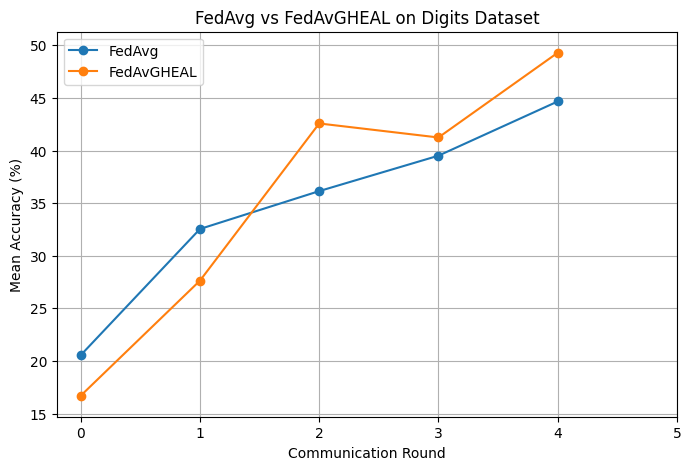

In [12]:
# Parameters for Federated Learning
params = {
    "Communication Epochs (Global Aggregation Cycles)": communication_epoch_var,
    "Local Epochs (Training per Participant)": local_epoch_var,
    "Total Number of Clients": no_of_total_clients,
    "Number of MNIST Clients": no_of_mnist_clients,
    "Number of USPS Clients": no_of_usps_clients,
    "Number of SVHN Clients": no_of_svhn_clients,
    "Number of SYN Clients": no_of_syn_clients,
    "Random Seed": random_seed,
    "Learning Rate Decay (0: No, 1: Yes)": learning_decay,
    "HEAL Threshold": threshold,
    "Momentum Update Factor (Beta)": beta,
    "Averaging Strategy": averaging,
    "CSV Log Enabled (1: Yes, 0: No)": csv_log_number
}

# Print the parameters beautifully
print("=" * 60)
print("FEDERATED LEARNING PARAMETERS".center(60))
print("=" * 60)
for key, value in params.items():
    print(f"{key:<40}: {value}")
print("=" * 60)

# Load data
df_fedheal = pd.read_csv(fedheal_mean_csv, header=None)
df_fedavg = pd.read_csv(fedavg_mean_csv, header=None)

# Extract accuracy data
fedavg_accs = df_fedavg.iloc[1].values.astype(float)
fedheal_accs = df_fedheal.iloc[1].values.astype(float)

# Communication rounds
rounds = range(len(fedavg_accs))

# Plot
plt.figure(figsize=(8, 5))
plt.plot(rounds, fedavg_accs, marker='o', label="FedAvg")
plt.plot(rounds, fedheal_accs, marker='o', label="FedAvGHEAL")
plt.title("FedAvg vs FedAvGHEAL on Digits Dataset")
plt.xlabel("Communication Round")
plt.ylabel("Mean Accuracy (%)")

# Set Y-axis to start from the minimum value of both datasets and increment consistently
plt.ylim(min(min(fedavg_accs), min(fedheal_accs)) - 2, max(max(fedavg_accs), max(fedheal_accs)) + 2)
plt.xticks(rounds)  # Align X-axis to communication rounds
plt.legend()
plt.grid(True)
plt.show()


# **INCREASING HETROGENETY BY DOUBLE**
*   Communication Epochs: 5
*   Local Epochs: 10
*   Total Number of Clients: 12  -  4 for Each Client
*   HEAL Threshold: 0.3


               FEDERATED LEARNING PARAMETERS                
Communication Epochs (Global Aggregation Cycles): 5
Local Epochs (Training per Participant) : 10
Total Number of Clients                 : 12
Number of MNIST Clients                 : 4
Number of USPS Clients                  : 4
Number of SVHN Clients                  : 4
Number of SYN Clients                   : 0
Random Seed                             : 42
Learning Rate Decay (0: No, 1: Yes)     : 0
HEAL Threshold                          : 0.3
Momentum Update Factor (Beta)           : 0.4
Averaging Strategy                      : weight
CSV Log Enabled (1: Yes, 0: No)         : 1


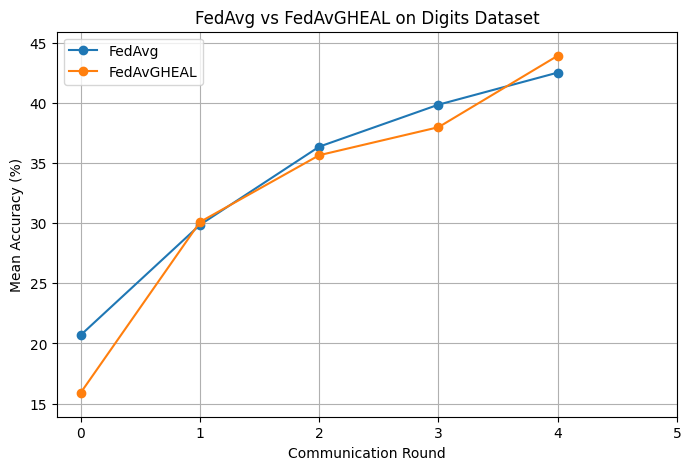

In [23]:
# Parameters for Federated Learning
params = {
    "Communication Epochs (Global Aggregation Cycles)": communication_epoch_var,
    "Local Epochs (Training per Participant)": local_epoch_var,
    "Total Number of Clients": no_of_total_clients,
    "Number of MNIST Clients": no_of_mnist_clients,
    "Number of USPS Clients": no_of_usps_clients,
    "Number of SVHN Clients": no_of_svhn_clients,
    "Number of SYN Clients": no_of_syn_clients,
    "Random Seed": random_seed,
    "Learning Rate Decay (0: No, 1: Yes)": learning_decay,
    "HEAL Threshold": threshold,
    "Momentum Update Factor (Beta)": beta,
    "Averaging Strategy": averaging,
    "CSV Log Enabled (1: Yes, 0: No)": csv_log_number
}

# Print the parameters beautifully
print("=" * 60)
print("FEDERATED LEARNING PARAMETERS".center(60))
print("=" * 60)
for key, value in params.items():
    print(f"{key:<40}: {value}")
print("=" * 60)

# Load data
df_fedheal = pd.read_csv(fedheal_mean_csv, header=None)
df_fedavg = pd.read_csv(fedavg_mean_csv, header=None)

# Extract accuracy data
fedavg_accs = df_fedavg.iloc[1].values.astype(float)
fedheal_accs = df_fedheal.iloc[1].values.astype(float)

# Communication rounds
rounds = range(len(fedavg_accs))

# Plot
plt.figure(figsize=(8, 5))
plt.plot(rounds, fedavg_accs, marker='o', label="FedAvg")
plt.plot(rounds, fedheal_accs, marker='o', label="FedAvGHEAL")
plt.title("FedAvg vs FedAvGHEAL on Digits Dataset")
plt.xlabel("Communication Round")
plt.ylabel("Mean Accuracy (%)")

# Set Y-axis to start from the minimum value of both datasets and increment consistently
plt.ylim(min(min(fedavg_accs), min(fedheal_accs)) - 2, max(max(fedavg_accs), max(fedheal_accs)) + 2)
plt.xticks(rounds)  # Align X-axis to communication rounds
plt.legend()
plt.grid(True)
plt.show()


# **INCREASING HETROGENETY BY TRIPLE**
*   Communication Epochs: 5
*   Local Epochs: 10
*   Total Number of Clients: 18  -  6 for Each Client
*   HEAL Threshold: 0.3


               FEDERATED LEARNING PARAMETERS                
Communication Epochs (Global Aggregation Cycles): 5
Local Epochs (Training per Participant) : 10
Total Number of Clients                 : 18
Number of MNIST Clients                 : 6
Number of USPS Clients                  : 6
Number of SVHN Clients                  : 6
Number of SYN Clients                   : 0
Random Seed                             : 42
Learning Rate Decay (0: No, 1: Yes)     : 0
HEAL Threshold                          : 0.3
Momentum Update Factor (Beta)           : 0.4
Averaging Strategy                      : weight
CSV Log Enabled (1: Yes, 0: No)         : 1


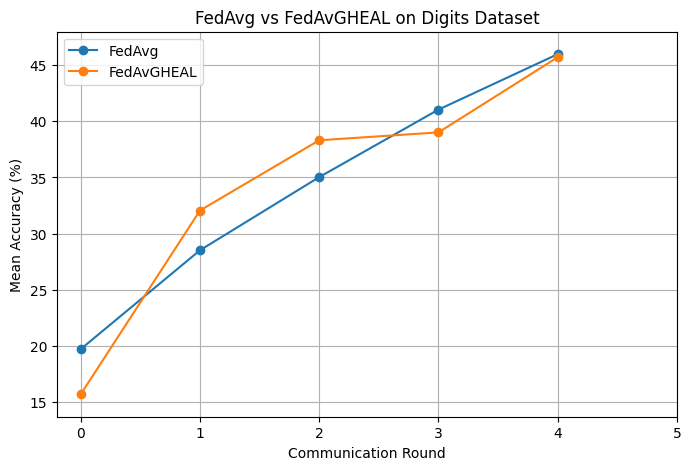

In [28]:
# Parameters for Federated Learning
params = {
    "Communication Epochs (Global Aggregation Cycles)": communication_epoch_var,
    "Local Epochs (Training per Participant)": local_epoch_var,
    "Total Number of Clients": no_of_total_clients,
    "Number of MNIST Clients": no_of_mnist_clients,
    "Number of USPS Clients": no_of_usps_clients,
    "Number of SVHN Clients": no_of_svhn_clients,
    "Number of SYN Clients": no_of_syn_clients,
    "Random Seed": random_seed,
    "Learning Rate Decay (0: No, 1: Yes)": learning_decay,
    "HEAL Threshold": threshold,
    "Momentum Update Factor (Beta)": beta,
    "Averaging Strategy": averaging,
    "CSV Log Enabled (1: Yes, 0: No)": csv_log_number
}

# Print the parameters beautifully
print("=" * 60)
print("FEDERATED LEARNING PARAMETERS".center(60))
print("=" * 60)
for key, value in params.items():
    print(f"{key:<40}: {value}")
print("=" * 60)

# Load data
df_fedheal = pd.read_csv(fedheal_mean_csv, header=None)
df_fedavg = pd.read_csv(fedavg_mean_csv, header=None)

# Extract accuracy data
fedavg_accs = df_fedavg.iloc[1].values.astype(float)
fedheal_accs = df_fedheal.iloc[1].values.astype(float)

# Communication rounds
rounds = range(len(fedavg_accs))

# Plot
plt.figure(figsize=(8, 5))
plt.plot(rounds, fedavg_accs, marker='o', label="FedAvg")
plt.plot(rounds, fedheal_accs, marker='o', label="FedAvGHEAL")
plt.title("FedAvg vs FedAvGHEAL on Digits Dataset")
plt.xlabel("Communication Round")
plt.ylabel("Mean Accuracy (%)")

# Set Y-axis to start from the minimum value of both datasets and increment consistently
plt.ylim(min(min(fedavg_accs), min(fedheal_accs)) - 2, max(max(fedavg_accs), max(fedheal_accs)) + 2)
plt.xticks(rounds)  # Align X-axis to communication rounds
plt.legend()
plt.grid(True)
plt.show()


# **INCREASING COMMUNICATION ROUNDS BY 10x**
*   Communication Epochs: 50
*   Local Epochs: 10
*   Total Number of Clients: 6  -  2 for Each Client
*   HEAL Threshold: 0.3


               FEDERATED LEARNING PARAMETERS                
Communication Epochs (Global Aggregation Cycles): 50
Local Epochs (Training per Participant) : 10
Total Number of Clients                 : 16
Number of MNIST Clients                 : 4
Number of USPS Clients                  : 4
Number of SVHN Clients                  : 4
Number of SYN Clients                   : 4
Random Seed                             : 42
Learning Rate Decay (0: No, 1: Yes)     : 0
HEAL Threshold                          : 0.5
Momentum Update Factor (Beta)           : 0.5
Averaging Strategy                      : weight
CSV Log Enabled (1: Yes, 0: No)         : 1


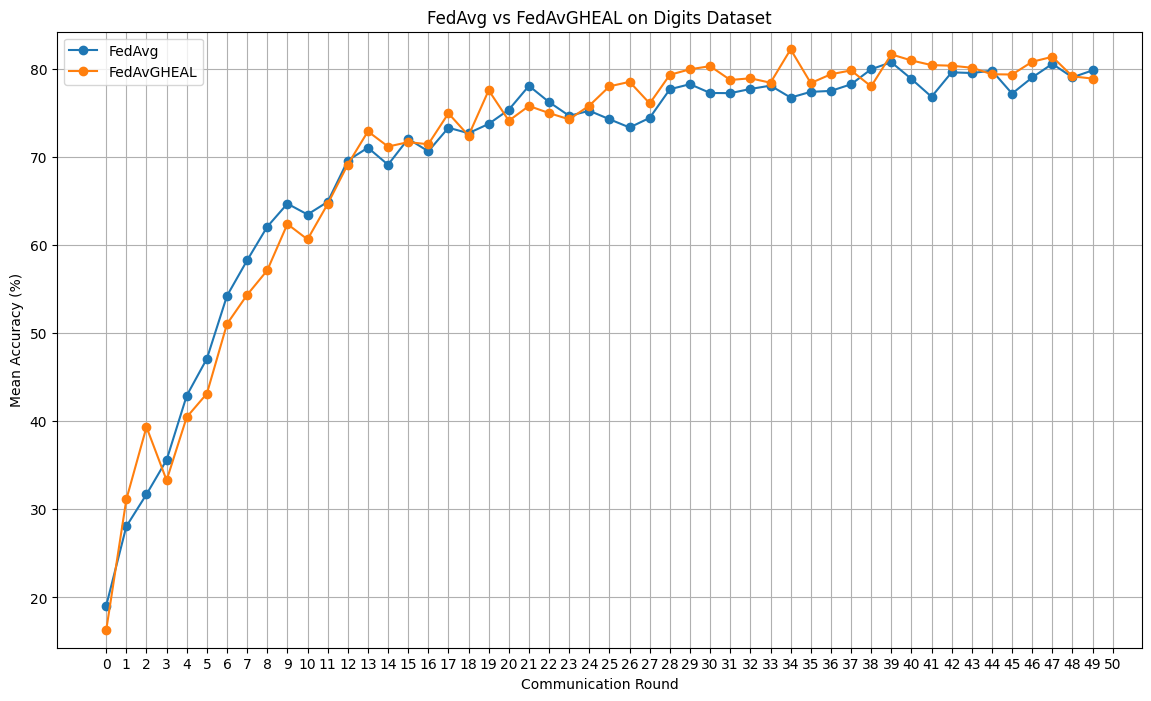

In [43]:
# Parameters for Federated Learning
params = {
    "Communication Epochs (Global Aggregation Cycles)": communication_epoch_var,
    "Local Epochs (Training per Participant)": local_epoch_var,
    "Total Number of Clients": no_of_total_clients,
    "Number of MNIST Clients": no_of_mnist_clients,
    "Number of USPS Clients": no_of_usps_clients,
    "Number of SVHN Clients": no_of_svhn_clients,
    "Number of SYN Clients": no_of_syn_clients,
    "Random Seed": random_seed,
    "Learning Rate Decay (0: No, 1: Yes)": learning_decay,
    "HEAL Threshold": threshold,
    "Momentum Update Factor (Beta)": beta,
    "Averaging Strategy": averaging,
    "CSV Log Enabled (1: Yes, 0: No)": csv_log_number
}

# Print the parameters beautifully
print("=" * 60)
print("FEDERATED LEARNING PARAMETERS".center(60))
print("=" * 60)
for key, value in params.items():
    print(f"{key:<40}: {value}")
print("=" * 60)

# Load data
df_fedheal = pd.read_csv(fedheal_mean_csv, header=None)
df_fedavg = pd.read_csv(fedavg_mean_csv, header=None)

# Extract accuracy data
fedavg_accs = df_fedavg.iloc[1].values.astype(float)
fedheal_accs = df_fedheal.iloc[1].values.astype(float)

# Communication rounds
rounds = range(len(fedavg_accs))

# Plot
plt.figure(figsize=(14, 8))
plt.plot(rounds, fedavg_accs, marker='o', label="FedAvg")
plt.plot(rounds, fedheal_accs, marker='o', label="FedAvGHEAL")
plt.title("FedAvg vs FedAvGHEAL on Digits Dataset")
plt.xlabel("Communication Round")
plt.ylabel("Mean Accuracy (%)")

# Set Y-axis to start from the minimum value of both datasets and increment consistently
plt.ylim(min(min(fedavg_accs), min(fedheal_accs)) - 2, max(max(fedavg_accs), max(fedheal_accs)) + 2)
plt.xticks(rounds)  # Align X-axis to communication rounds
plt.legend()
plt.grid(True)
plt.show()


               FEDERATED LEARNING PARAMETERS                
Communication Epochs (Global Aggregation Cycles): 50
Local Epochs (Training per Participant) : 10
Total Number of Clients                 : 18
Number of MNIST Clients                 : 6
Number of USPS Clients                  : 6
Number of SVHN Clients                  : 6
Number of SYN Clients                   : 0
Random Seed                             : 42
Learning Rate Decay (0: No, 1: Yes)     : 0
HEAL Threshold                          : 0.5
Momentum Update Factor (Beta)           : 0.5
Averaging Strategy                      : weight
CSV Log Enabled (1: Yes, 0: No)         : 1


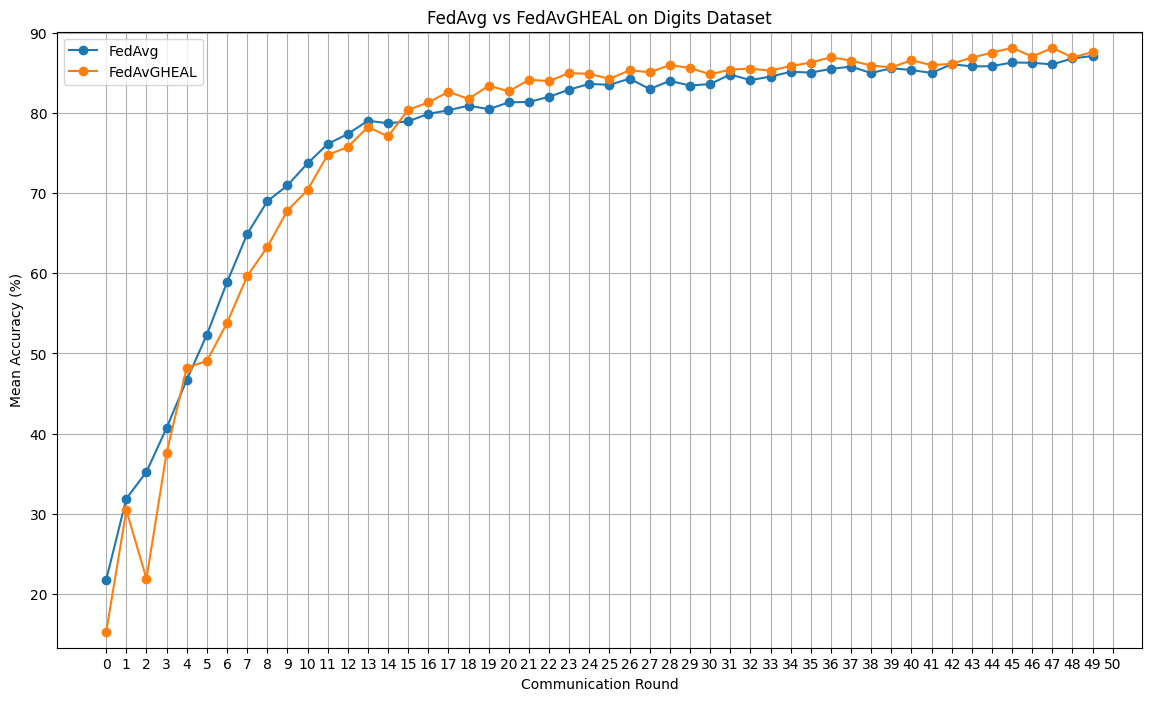

In [55]:
# Parameters for Federated Learning
params = {
    "Communication Epochs (Global Aggregation Cycles)": communication_epoch_var,
    "Local Epochs (Training per Participant)": local_epoch_var,
    "Total Number of Clients": no_of_total_clients,
    "Number of MNIST Clients": no_of_mnist_clients,
    "Number of USPS Clients": no_of_usps_clients,
    "Number of SVHN Clients": no_of_svhn_clients,
    "Number of SYN Clients": no_of_syn_clients,
    "Random Seed": random_seed,
    "Learning Rate Decay (0: No, 1: Yes)": learning_decay,
    "HEAL Threshold": threshold,
    "Momentum Update Factor (Beta)": beta,
    "Averaging Strategy": averaging,
    "CSV Log Enabled (1: Yes, 0: No)": csv_log_number
}

# Print the parameters beautifully
print("=" * 60)
print("FEDERATED LEARNING PARAMETERS".center(60))
print("=" * 60)
for key, value in params.items():
    print(f"{key:<40}: {value}")
print("=" * 60)

# Load data
df_fedheal = pd.read_csv(fedheal_mean_csv, header=None)
df_fedavg = pd.read_csv(fedavg_mean_csv, header=None)

# Extract accuracy data
fedavg_accs = df_fedavg.iloc[1].values.astype(float)
fedheal_accs = df_fedheal.iloc[1].values.astype(float)

# Communication rounds
rounds = range(len(fedavg_accs))

# Plot
plt.figure(figsize=(14, 8))
plt.plot(rounds, fedavg_accs, marker='o', label="FedAvg")
plt.plot(rounds, fedheal_accs, marker='o', label="FedAvGHEAL")
plt.title("FedAvg vs FedAvGHEAL on Digits Dataset")
plt.xlabel("Communication Round")
plt.ylabel("Mean Accuracy (%)")

# Set Y-axis to start from the minimum value of both datasets and increment consistently
plt.ylim(min(min(fedavg_accs), min(fedheal_accs)) - 2, max(max(fedavg_accs), max(fedheal_accs)) + 2)
plt.xticks(rounds)  # Align X-axis to communication rounds
plt.legend()
plt.grid(True)
plt.show()
